### Data analysis of Section 5 data.

1. Check all 6 surface maps without thermal compensation (250107)
1. Check all 6 surface maps with thermal compensation (use this for all following steps)
2. average surface maps
2. check the forces applied and compare to polishing forces we intended to apply
3. look at how well we can correct these surface maps using rigid body (RB) motions and bending modes
    - Decompose into Zernikes, use RB sensitivity matrix to get RB motions
    - Decompose residual surface map into 14 bending modes, get residual map and correction forces required.
    - Decompose residual surface map into 27 bending modes, get residual map and correction forces required.
    - Decompose residual surface map into 46 bending modes, get residual map and correction forces required.
    - compare the results above with what we get using Buddy's method (Matlab code)
4. Compare the residual surfaces above to surfaces at S3 acceptance, with and without thermal compensation
5. Can we explain the difference in residual maps using difference in thermal conditions?
6. Calculate the PSSn for these residual surfaces and compare the GMT NS Image Quality Error budget.
8. Repeat the above for the 250109 data (without AcO forces calculated at S3 acceptance)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.jet()

import sys
sys.path.insert(0, '../')
from M1S_tools import *
import glob
from scipy.io import savemat

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/influnce_matrix_files/OA_influence_matrices_all/OA_surface_normal_165SA_09Jan2025/
Afz =  (27547, 165)
Afx =  (27547, 165)
Afy =  (27547, 165)
U

<Figure size 640x480 with 0 Axes>

//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set01 1pt87mm burst60 gmtMorph170614 LFSsub.h5: Tue Jan 07 12:43:32 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set02 1pt87mm burst60 gmtMorph170614 LFSsub.h5: Tue Jan 07 12:52:18 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set03 1pt87mm burst60 gmtMorph170614 LFSsub.h5: Tue Jan 07 13:00:39 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set04 1pt87mm burst60 gmtMorph170614 LFSsub.h5: Tue Jan 07 13:09:16 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set05 1pt87mm burst60 gmtMorph170614 LFSsub.h5: Tue Jan 07 13:26:43 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set06 1pt87mm burst60 gmtMorph170614 LFSsub.h5: Tue Jan 07 13:36:55 2025 


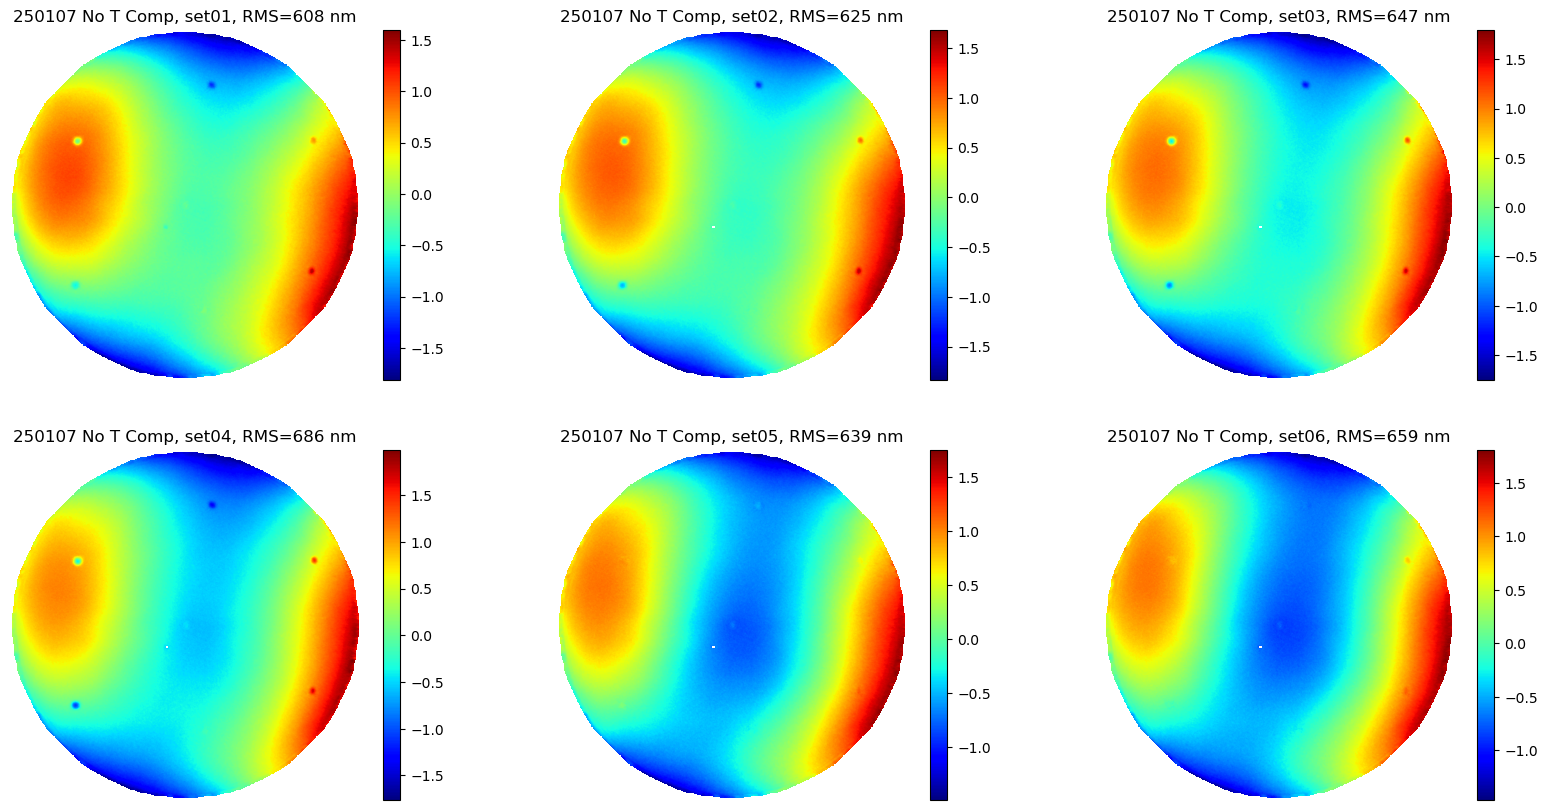

In [3]:
# without T comp
dateID = '250107'
ts_array = []
fig, ax = plt.subplots(2,3,figsize=(20,10))
for i in range(6):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    
    fileset = sorted(glob.glob('/%s/Sec 5/%s/%s*set0%d*sub.h5'%(ml_data_dir,dateID, dateID, i+1)))
    assert len(fileset)==1
    m1s,centerRow,centerCol,pixelSize,ts = readH5Map(fileset)
    ts_array.append(ts)

    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    img = ax[irow][icol].imshow(m1s, origin='lower')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('%s No T Comp, set0%d, RMS=%.0f nm'%(dateID,i+1, m1rms))
    ax[irow][icol].axis('off')

//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set01 1pt87mm burst60 gmtMorph170614 LFSsub comp.h5: Tue Jan 07 12:43:32 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set02 1pt87mm burst60 gmtMorph170614 LFSsub comp.h5: Tue Jan 07 12:52:18 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set03 1pt87mm burst60 gmtMorph170614 LFSsub comp.h5: Tue Jan 07 13:00:39 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set04 1pt87mm burst60 gmtMorph170614 LFSsub comp.h5: Tue Jan 07 13:09:16 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set05 1pt87mm burst60 gmtMorph170614 LFSsub comp.h5: Tue Jan 07 13:26:43 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250107/250107 GMT3 set06 1pt87mm burst60 gmtMorph170614 LFSsub comp.h5: Tue Jan 07 13:36:55 2025

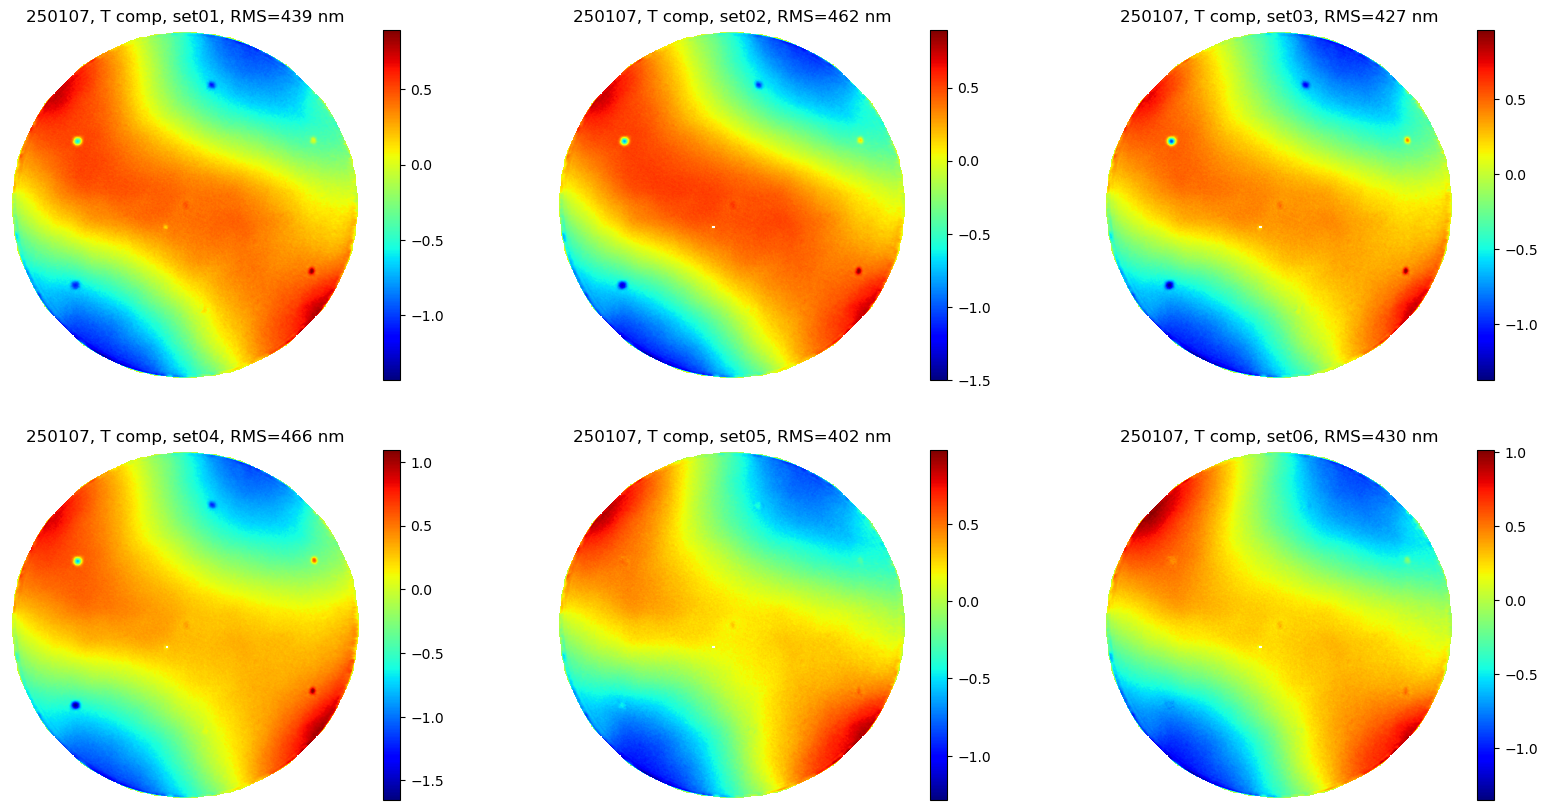

In [4]:
# with T comp
dateID = '250107'
m1sAve = np.zeros((Sxn, Syn))
fig, ax = plt.subplots(2,3,figsize=(20,10))
for i in range(6):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    
    fileset = sorted(glob.glob('/%s/Sec 5/%s/%s*set0%d*comp.h5'%(ml_data_dir,dateID, dateID, i+1)))
    assert len(fileset)==1
    m1s,centerRow,centerCol,pixelSize,ts = readH5Map(fileset)
    m1sAve += m1s
    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    img = ax[irow][icol].imshow(m1s, origin='lower')
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('%s, T comp, set0%d, RMS=%.0f nm'%(dateID,i+1, m1rms))
    ax[irow][icol].axis('off')
m1sAve /= 6

In [5]:
#get the forces,so that we can compare with those from day 2
sa_force1, tt = getDBData(unix_ts(ts)-120,'m1_s1_support_ctrl/s/sa_force/value', duration_in_s=120, samples=120)
sa_force1_z = np.mean(sa_force1,axis=0)[:,2]

m1_s1_support_ctrl/s/sa_force/value
2025-01-07 13:34:55  duration =  120  s
(120, 170, 3)
(120, 170, 3)


//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250109/250109 GMT3 set01 1pt2mm burst60 gmtMorph170614 LFSsub.h5: Thu Jan 09 13:19:10 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250109/250109 GMT3 set02 1pt2mm burst60 gmtMorph170614 LFSsub.h5: Thu Jan 09 13:41:45 2025 


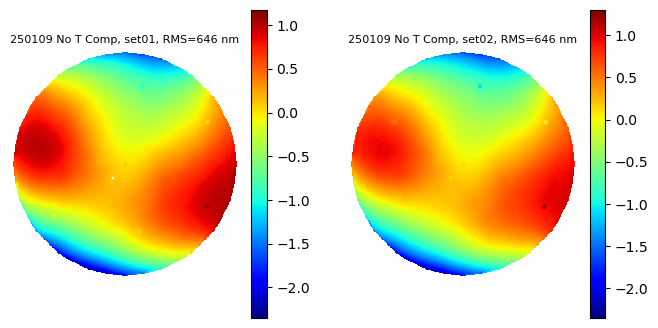

In [6]:
# without T comp
dateID = '250109'
fig, ax = plt.subplots(1,2,figsize=(8,4))
for i in range(2):
    irow = np.int8(i/2)
    icol = np.mod(i,2)
    
    fileset = sorted(glob.glob('/%s/Sec 5/%s/%s*set0%d*sub.h5'%(ml_data_dir,dateID, dateID, i+1)))
    assert len(fileset)==1
    m1s,centerRow,centerCol,pixelSize,ts = readH5Map(fileset)

    m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
    img = ax[icol].imshow(m1s, origin='lower')
    fig.colorbar(img, ax=ax[icol])
    ax[icol].set_title('%s No T Comp, set0%d, RMS=%.0f nm'%(dateID,i+1, m1rms), fontsize=8)
    ax[icol].axis('off')

//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250109/250109 GMT3 set01 1pt2mm burst60 gmtMorph170614 LFSsub comp.h5: Thu Jan 09 13:19:10 2025 
//Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 5/250109/250109 GMT3 set02 1pt2mm burst60 gmtMorph170614 LFSsub comp.h5: Thu Jan 09 13:41:45 2025 


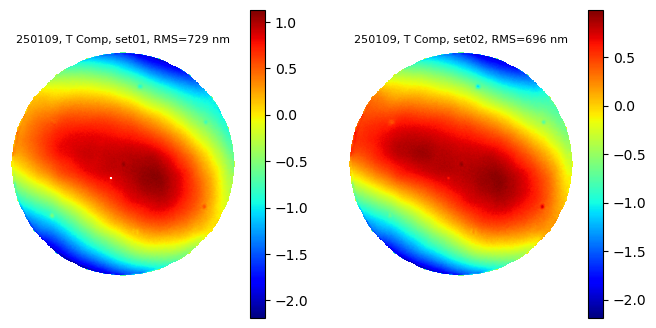

In [6]:
# with T comp
dateID = '250109'
ts_list = []
fig, ax = plt.subplots(1,2,figsize=(8,4))
for i in range(2):
    irow = np.int8(i/2)
    icol = np.mod(i,2)
    
    fileset = sorted(glob.glob('/%s/Sec 5/%s/%s*set0%d*comp.h5'%(ml_data_dir,dateID, dateID, i+1)))
    if len(fileset)>0:
        m1s,centerRow,centerCol,pixelSize,ts = readH5Map(fileset)
        ts_list.append(ts)

        m1rms = np.std(m1s[~np.isnan(m1s)])*1000 #convert into nm
        img = ax[icol].imshow(m1s, origin='lower')
        fig.colorbar(img, ax=ax[icol])
        ax[icol].set_title('%s, T Comp, set0%d, RMS=%.0f nm'%(dateID,i+1, m1rms), fontsize=8)
        ax[icol].axis('off')

Q: Are the two sets from day 2 both with AcO forces subtracted? or one with and one without?

A: No. They were with the same forces. (see below)

In [7]:
#set1, name it 1-prime (1p)
sa_force1p, tt = getDBData(unix_ts(ts_list[0]),'m1_s1_support_ctrl/s/sa_force/value', duration_in_s=2, samples=1)
sa_force1p_z = np.mean(sa_force1p,axis=0)[:,2]
#set2,
sa_force2, tt = getDBData(unix_ts(ts_list[1]),'m1_s1_support_ctrl/s/sa_force/value', duration_in_s=2, samples=1)
sa_force2_z = np.mean(sa_force2,axis=0)[:,2]

m1_s1_support_ctrl/s/sa_force/value
2025-01-09 13:19:10  duration =  2  s
(1, 170, 3)
(1, 170, 3)
m1_s1_support_ctrl/s/sa_force/value
2025-01-09 13:41:45  duration =  2  s
(1, 170, 3)
(1, 170, 3)


input forces and output figure both in M1B


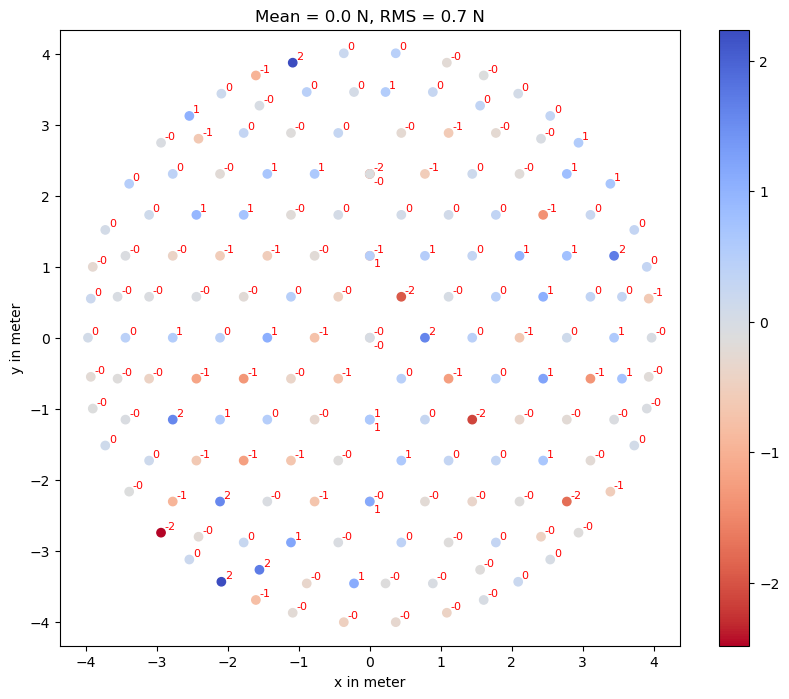

In [8]:
aa = sa_force1p_z-sa_force2_z #-swFvec2gmtFvec(f_active)
showForceMap_M1B(aa,'Mean = %.1f N, RMS = %.1f N'%(np.mean(aa), np.std(aa-np.mean(aa))))

Q: Were the day2 forces really day1 forces minus AcO forces?

A: yes, but a few SAs seems to be off a bit. See below.

In [9]:
dataFolder = '../model_data/'
df = pd.read_excel(dataFolder+'gmt3_final_forces_english.xlsx', skiprows=2)
nact_sw = len(df)
print('Number of actuators = ', nact_sw)

sax_sw = np.array(df['y_opt (in)'])*in2mm/1000 #swap x/y to get to M1B (M1DCS uses M1B!!!)
say_sw = np.array(df['x_opt (in)'])*in2mm/1000
f_FEM = np.array(df['f_FEM (lbs)'])*lbs2N
f_active = np.array(df['f_active (lbs)'])*lbs2N
f_quad = np.array(df['newquad_corr (lbs)'])*lbs2N
f_corr = np.array(df['gmto_zfrc (lbs)'])*lbs2N
saID_sw_q = np.array(df['act #']) #steve west assigned these IDs, whether they are same as Trupti's is Questionable

Number of actuators =  170


input forces and output figure both in M1B


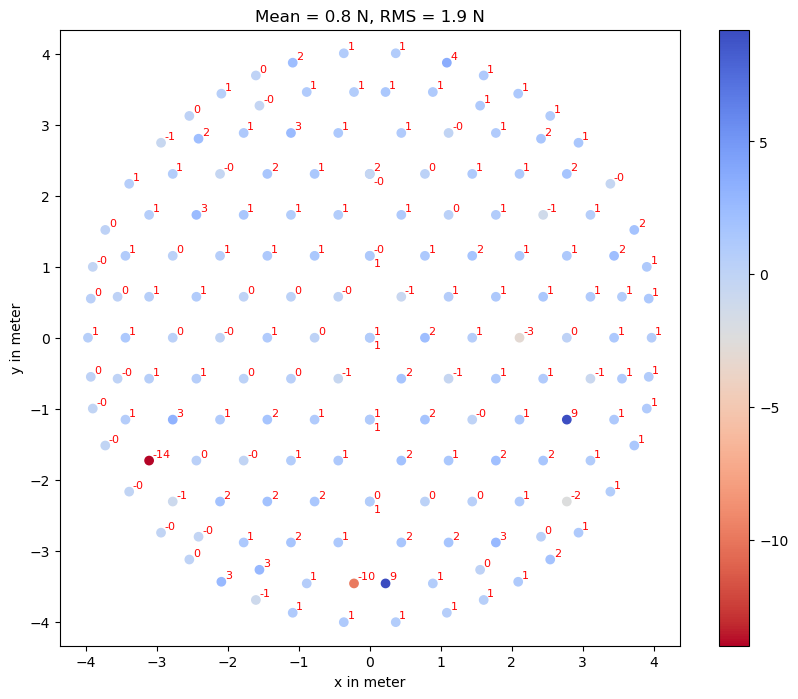

In [10]:
aa = sa_force1_z-sa_force2_z-swFvec2gmtFvec(f_active)
showForceMap_M1B(aa,'Mean = %.1f N, RMS = %.1f N'%(np.mean(aa), np.std(aa-np.mean(aa))))

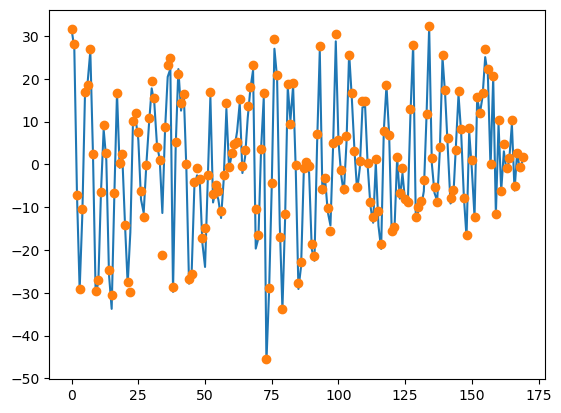

In [11]:
plt.plot(swFvec2gmtFvec(f_active))
plt.plot(sa_force1_z-sa_force2_z, 'o')

### Move ahead with surface optimization calculations

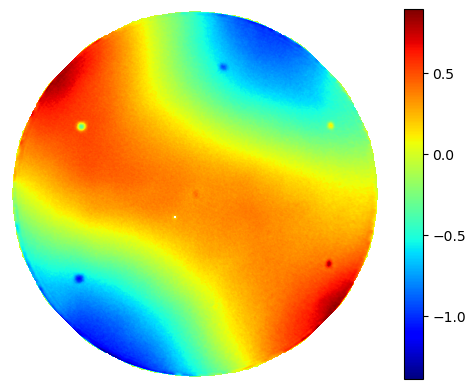

In [13]:
plt.imshow(m1sAve, origin='lower')
plt.axis('off')
plt.colorbar();

In [76]:
dateID = '250107'
writeH5map(ml_data_dir+'Sec 5/'+dateID+'/m1sAve.h5', m1sAve, centerRow, centerCol, pixelSize, ts)

In [77]:
m1sback,centerRow,centerCol,pixelSize,ts = readH5Map([ml_data_dir+'Sec 5/'+dateID+'/m1sAve.h5'])

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data/Sec 5/250107/m1sAve.h5: Thu Jan 09 13:41:45 2025 


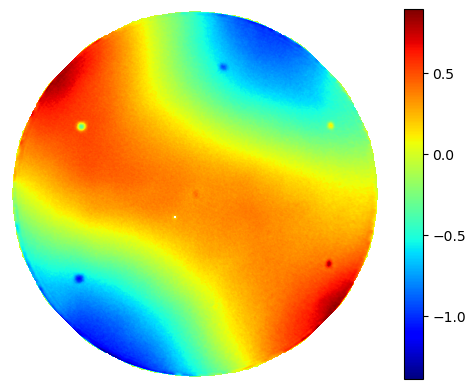

In [78]:
plt.imshow(m1sback, origin='lower')
plt.axis('off')
plt.colorbar();

### Fit to Zernikes

In [43]:
[x1, y1] = mkXYGrid(m1s, centerRow, centerCol, pixelSize)
r1 = np.sqrt(x1**2 + y1**2)
mask = (~np.isnan(m1s)) & (r1<=radius_of_CA)

In [53]:
nzer = 11
nnodes = np.sum(mask)
zerU = np.zeros((nnodes, nzer))
for i in range(nzer):
    zerU[:,i] = zernike_polynomial(i+1, x1[mask]/radius_of_CA, y1[mask]/radius_of_CA)

In [54]:
aa = zerU.transpose() / zerU.shape[0] @ m1s[mask]

In [55]:
recon = np.zeros_like(m1s)
recon[~mask] = np.nan
for i in range(nzer):
    recon[mask] += aa[i]*zerU[:,i]

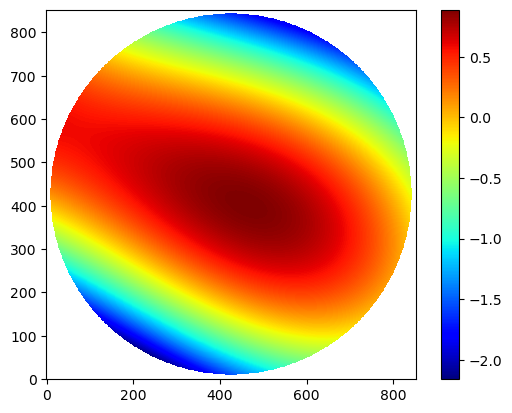

In [56]:
plt.imshow(recon, origin='lower')
plt.colorbar();

In [59]:
#another way of fitting to (low order) zernikes (as a sanity check.)
bb = ZernikeMaskedFit(m1s, x1/radius_of_CA, y1/radius_of_CA, 11, mask, 0)
recon2 = ZernikeEval(bb, x1/radius_of_CA, y1/radius_of_CA)

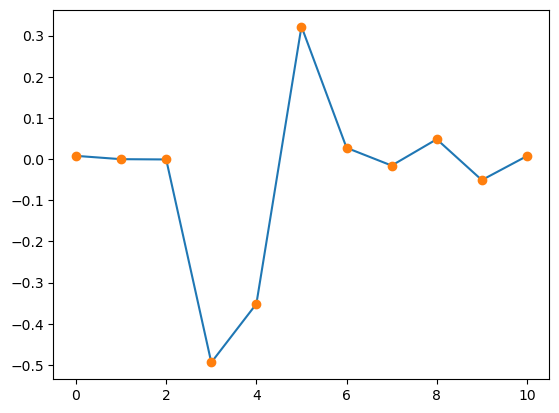

In [61]:
plt.plot(aa)
plt.plot(bb,'o');
#perfect match

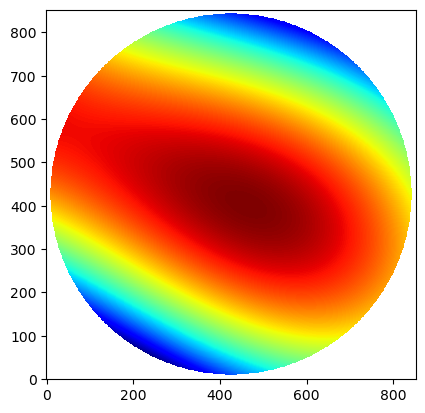

In [68]:
recon2[~mask] = np.nan
plt.imshow(recon2, origin='lower')

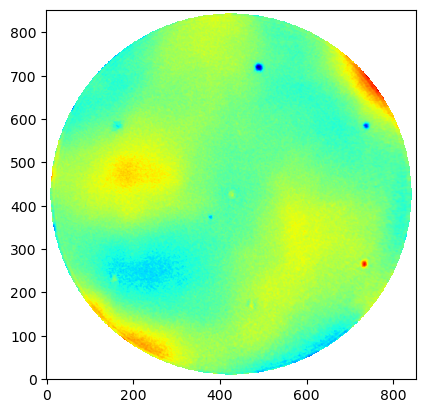

In [83]:
plt.imshow(m1s-recon2, origin='lower');
#residual after Zernike fit

### the 5x2 sensitivity matrix

### do I have the correct sensitivity matrix? 
### we can take buddy's maps before and after the RB alignment

In [120]:
m1salign14,centerRow,centerCol,pixelSize,ts = readH5Map([ml_data_dir+'Sec 5/'+dateID+'/m1sAve_alignFor14.h5'])

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data/Sec 5/250107/m1sAve_alignFor14.h5: date not in h5 file. 


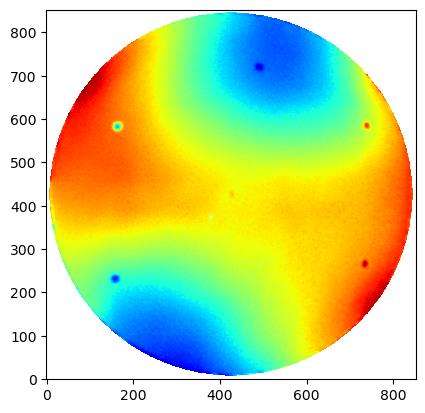

In [80]:
plt.imshow(m1salign14, origin='lower')

In [121]:
aa_buddy = ZernikeMaskedFit(m1salign14, x1/radius_of_CA, y1/radius_of_CA, 11, mask, 0)

In [137]:
#1./1000 turn nm into micron
RB_sen = 1./1000* np.array([[806, 0], #z4, radialShift (nm/mm) and clocking (nm/mrad)
                  [0, -5090], #z5
                  [506, 0], #z6
                  [0, -660], #z7
                  [34, 0]] #z8
                 ) #*2. #change from surface to wavefront
rb_buddy = [0.1474, -0.0327]

rederive_sen = False
if rederive_sen:
    RB_sen[0,0] = (aa_buddy[3] -aa[3])/rb_buddy[0]
    RB_sen[1,1] = (aa_buddy[4] -aa[4])/rb_buddy[1]
    RB_sen[2,0] = (aa_buddy[5] -aa[5])/rb_buddy[0]
    RB_sen[3,1] = (aa_buddy[6] -aa[6])/rb_buddy[1]
    RB_sen[4,0] = (aa_buddy[7] -aa[7])/rb_buddy[0]

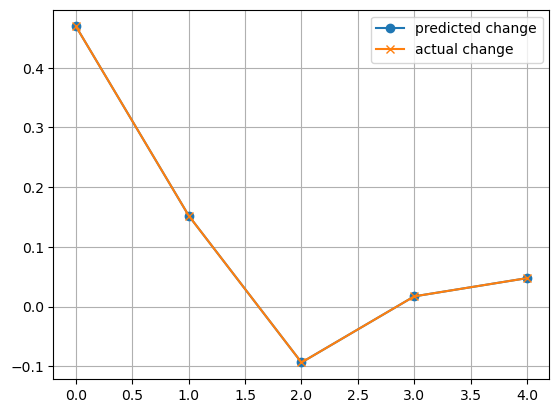

In [138]:
plt.plot(RB_sen@rb_buddy,'-o', label='predicted change')
plt.plot(aa_buddy[3:8]-aa[3:8],'-x', label='actual change')
plt.legend()
plt.grid();
#this looks like my sensitivity matrix is wrong.

In [139]:
#with "-" it is estimate error. Need "-" to turn it into correction.
myrb = -np.linalg.pinv(RB_sen) @ aa[4-1:8]
print(myrb)
#this is about twice of Buddy's corrections

[ 0.16755008 -0.07390906]


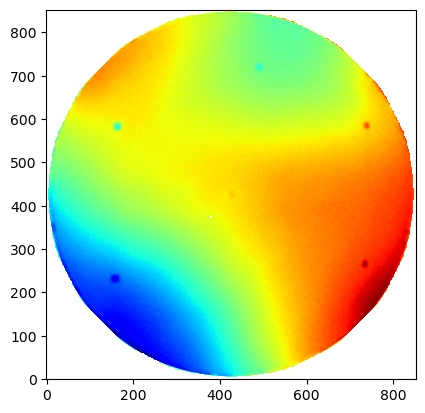

In [102]:
#expected residual after my RB corrections
plt.imshow(m1sAve + ZernikeEval(RB_sen@myrb, x1/radius_of_CA, y1/radius_of_CA), origin='lower')

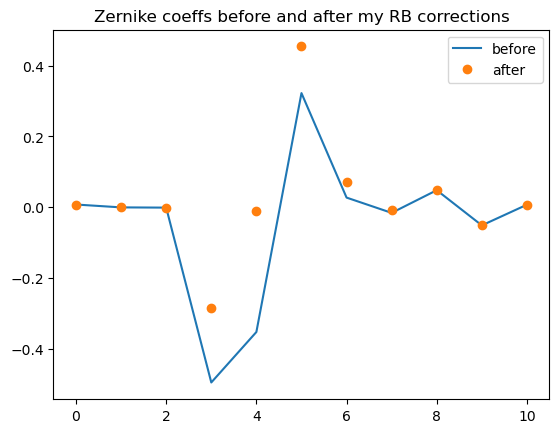

In [104]:
newZ = aa.copy()
newZ[4-1:8] += RB_sen@myrb
plt.plot(aa, label='before')
plt.plot(newZ,'o', label='after')
plt.legend()
plt.title('Zernike coeffs before and after my RB corrections');

Did Buddy completely eliminate z4-z8 with RB motions?

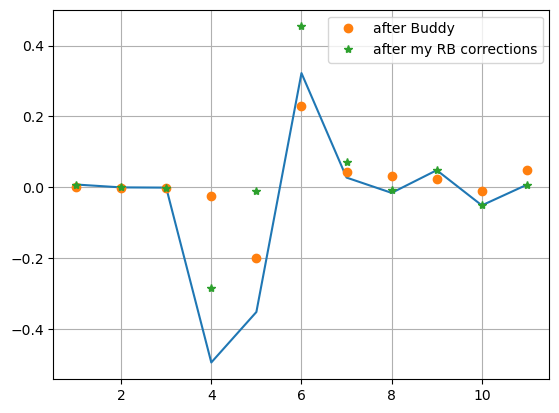

In [108]:
x0 = range(1,nzer+1)
plt.plot(x0, aa)
plt.plot(x0, cc,'o', label='after Buddy')
plt.plot(x0, newZ,'*', label='after my RB corrections')
plt.grid()
plt.legend();

In [106]:
#with "-" it is estimate error. Need "-" to turn it into correction.
myrb = -np.linalg.pinv(RB_sen) @ aa[4-1:8]
print(myrb)

NameError: name 'x0' is not defined

In [115]:
W = np.diag([1,1,1,1,1])
print(-np.linalg.inv(RB_sen.T@W@RB_sen) @ RB_sen.T @ W @ aa[4-1:8])
print(myrb)

[ 0.25991089 -0.06726017]
[ 0.25991089 -0.06726017]


In [117]:
W = np.diag([0.036412, 0.013194, 0.013194, 0.07722, 0.07722])
myrbw = -np.linalg.inv(RB_sen.T@W@RB_sen) @ RB_sen.T @ W @ aa[4-1:8]
print(myrbw)

[ 0.45683861 -0.05917089]


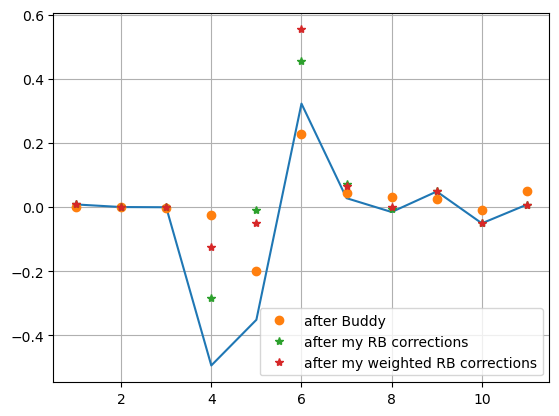

In [119]:
newZw = aa.copy()
newZw[4-1:8] += RB_sen@myrbw

x0 = range(1,nzer+1)
plt.plot(x0, aa)
plt.plot(x0, cc,'o', label='after Buddy')
plt.plot(x0, newZ,'*', label='after my RB corrections')
plt.plot(x0, newZw,'*', label='after my weighted RB corrections')
plt.grid()
plt.legend();